# Analyse des US Superstore Datensatzes

Dieser Datensatz (.xls-Dateien) benötigen das Modul `xlrd` da `.read_excel` nur noch das neuere Format `.xlsx` unterstützt.

Quelle: https://www.kaggle.com/code/khalidashraf10/us-superstore-analysis/input

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split

# XML-Datei mit Daten laden
df = pd.read_excel('../Datensätze/US_Superstore_data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [35]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


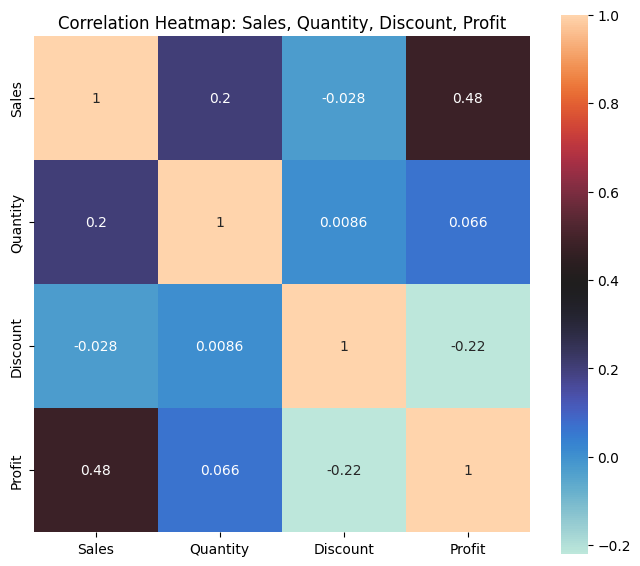

In [36]:
plt.figure(figsize=(8,7))
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), vmax=1, square=True, annot=True, cmap='icefire')
plt.title('Correlation Heatmap: Sales, Quantity, Discount, Profit')
plt.show()

In [37]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [38]:
df.duplicated().sum()

0

In [39]:
df.drop(['Row ID','Order ID' ,'Customer Name','Postal Code' , 'Product ID' ], axis=1 , inplace=True)
df.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Ship Mode         4
Segment           3
Country           1
City            531
State            49
Region            4
Category          3
Sub-Category     17
dtype: int64


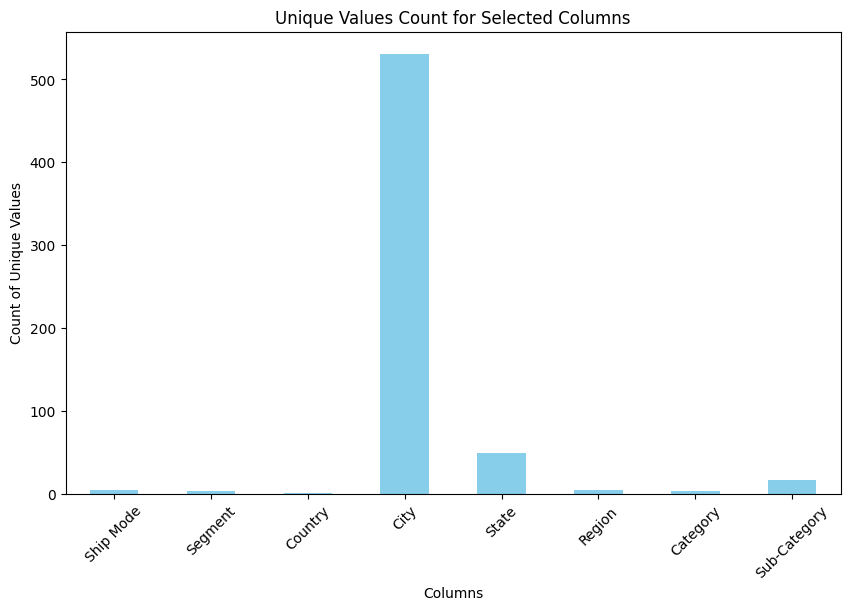

In [40]:
# Count unique values per column
 
# Spalten: "Ship Mode", "Segment", "Country", "City", "State", "Region", "Category", "Sub-Category" und "Product Name"
columns_to_plot = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
unique_counts_selected = df[columns_to_plot].nunique()
print(unique_counts_selected)
 
# Man kann die Spalten löschen, bei denen an nur eine Kategorie hat!
# Spalten: "Ship Mode", "Segment", "Country", "City", "State", "Region", "Category", "Sub-Category"
# Plotting the unique counts in a bar chart
plt.figure(figsize=(10, 6))
unique_counts_selected.plot(kind='bar', color='skyblue')
plt.title('Unique Values Count for Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Count of Unique Values')
plt.xticks(rotation=45)
plt.show()


In [41]:
df.drop(['Country'], axis=1 , inplace=True) 

Aus dem Dataframe wird die Spalte 'Country' gelöscht axis=1 ist auf die Spalte bezogen, inplace=True : hier wird die Änderung am Original vorgenommen

In [42]:
# df['Sell_Price']=df.apply(lambda x : ((x['Sales']*x['Quantity'])-(x['Sales']*x['Quantity'])*x['Discount'])-x['Profit'] , axis=1) # Man wendet die lambda-Funktion auf die Spalte an

```python
1. Die Spalte Sales ist vom Datentyp float64
2. Die Spalte Profit ist auch ein float64

Sell_Price = (  (  (261.96 * 2) -    (261.96 * 2)* 0 % Rabatt    )    - 41.91 Profit)

           = (523.92 - 523.92) - 41.91
           
           = 0 - 41.91

           = 482???
```

In [53]:
df['EK']=df.apply((lambda x : ((x['Sales']-x['Profit'])*x['Discount'])/x['Quantity']), axis=1)

In [56]:
df['Discounted_Unit_Price'] = df.apply(lambda x: (x['Sales'] * (1 - x['Discount'])) / x['Quantity'], axis=1)

In [57]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,EK,Discounted_Unit_Price
0,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.000000,130.980000
1,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.000000,243.980000
2,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.000000,7.310000
3,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,120.654765,105.333525
4,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,1.985160,8.947200


# Fragestellungen

Was interesseiert uns überhaupt aus diesem Riesen Haufen an Daten?

- Welche Produkte haben sich am besten verkauft?
- In welche Produkt-Kategorie gab es die meisten Verkäufe?
- Bei welchen Produkten war der Profit am größten?
- Wie lang ist die Durchschnittliche Bearbeitungszeit, zwischen Bestellung und Versand?

In [55]:
delifery = df['Ship Mode'].value_counts
delifery

<bound method IndexOpsMixin.value_counts of 0         Second Class
1         Second Class
2         Second Class
3       Standard Class
4       Standard Class
             ...      
9989      Second Class
9990    Standard Class
9991    Standard Class
9992    Standard Class
9993      Second Class
Name: Ship Mode, Length: 9994, dtype: object>